In [ ]:
<h1>Импорт библиотек

In [4]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [8]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])

    for matrix, vector in zip(X, V):
        if matrix.shape[1] != vector.shape[0]:
            raise ValueError(f"Матрица {matrix.shape} и вектор {vector.shape} имеют несовместимые размерности")
        result += np.dot(matrix, vector)

    return result
matrix = np.array([[2, 0], [0, 2]])
vector = np.array([[1], [1]])
expected = np.array([[2], [2]])
assert np.array_equal(sum_prod([matrix], [vector]), expected)

try:
    matrices = [np.array([[1, 0, 0], [0, 1, 0]])]
    vectors = [np.array([[1], [2]])]
    sum_prod(matrices, vectors)
    assert False
except ValueError:
    pass 

matrices = [np.zeros((3, 3)), np.zeros((3, 3))]
vectors = [np.zeros((3, 1)), np.zeros((3, 1))]
expected = np.zeros((3, 1))
assert np.array_equal(sum_prod(matrices, vectors), expected)

matrices = [np.eye(4), np.eye(4)]
vectors = [np.ones((4, 1)), np.ones((4, 1))]
expected = np.array([[2], [2], [2], [2]])
assert np.array_equal(sum_prod(matrices, vectors), expected)

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [10]:
def binarize(M, threshold=0.5):
    return (M >= threshold).astype(int)

M = np.array([[0.2, 0.5, 0.7], [0.8, 0.3, 0.1]])
threshold = 0.5
expected = np.array([[0, 1, 1], [1, 0, 0]])
assert np.array_equal(binarize(M, threshold), expected)

M = np.array([[4, 5, 6], [7, 5, 3]])
threshold = 5
expected = np.array([[0, 1, 1], [1, 1, 0]])
assert np.array_equal(binarize(M, threshold), expected)

M = np.array([[1, 2], [3, 4]])
threshold = 10
expected = np.array([[0, 0], [0, 0]])
assert np.array_equal(binarize(M, threshold), expected)

M = np.array([[11, 12], [13, 14]])
threshold = 10
expected = np.array([[1, 1], [1, 1]])
assert np.array_equal(binarize(M, threshold), expected)

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    return [set(row) for row in mat]

def unique_columns(mat):
    transposed = zip(*mat)
    return [set(col) for col in transposed]
mat1 = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
assert unique_rows(mat1) == [{1, 2, 3}, {4, 5, 6}, {7, 8, 9}]
assert unique_columns(mat1) == [{1, 4, 7}, {2, 5, 8}, {3, 6, 9}]
mat2 = [
        [1, 2, 2],
        [3, 3, 4],
        [4, 4, 4]
    ]
assert unique_rows(mat2) == [{1, 2}, {3, 4}, {4}]
assert unique_columns(mat2) == [{1, 3, 4}, {2, 3, 4}, {2, 4}]
mat3 = [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]
assert unique_rows(mat3) == [{1}, {1}, {1}]
assert unique_columns(mat3) == [{1}, {1}, {1}]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
[[-0.52641076  0.43441209  0.14747559 -1.99434436 -1.13804035]
 [ 0.0515306  -0.9544364  -0.7835513  -0.99294392 -1.67745276]
 [-1.02516113  1.31334224 -0.38630239 -1.10063269 -0.41084469]
 [-0.92034525  2.03656285  0.34178244 -0.84980341 -0.61835831]]

Средние значения по строкам: [-0.61538156 -0.87137076 -0.32191973 -0.00203234]
Дисперсии по строкам: [0.77332883 0.30618146 0.75741537 1.24319021]

Средние значения по столбцам: [-0.60509663  0.7074702  -0.17014891 -1.2344311  -0.96117403]
Дисперсии по столбцам: [0.17829667 1.24251562 0.19648596 0.20040617 0.24118048]



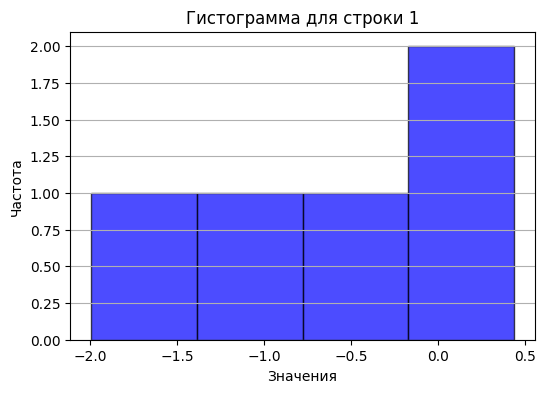

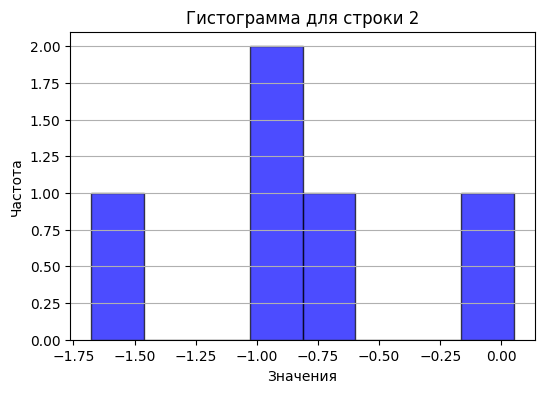

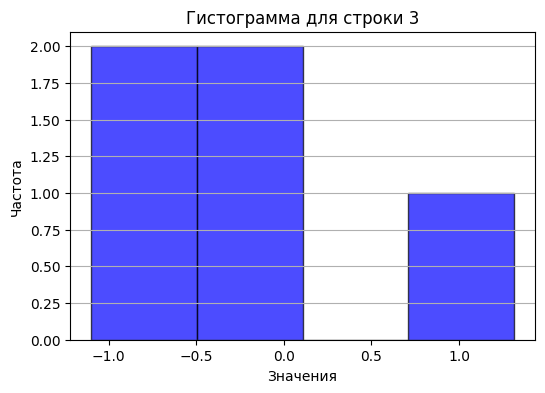

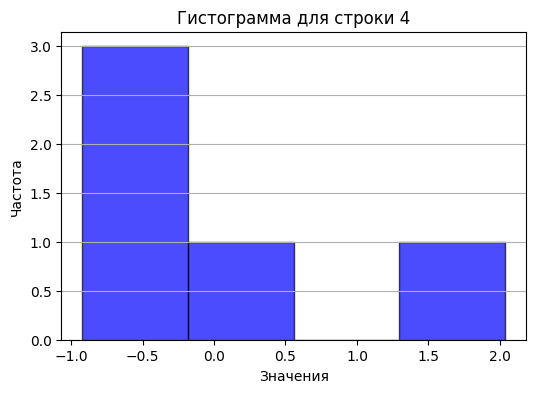

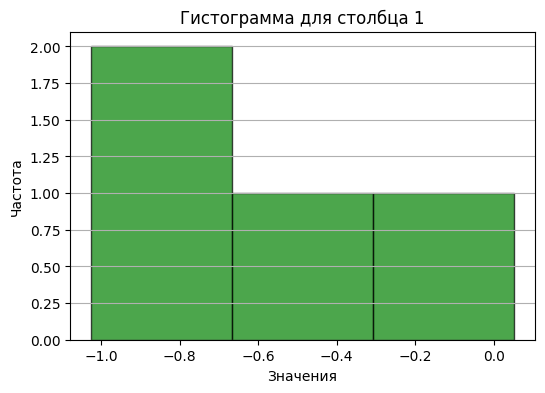

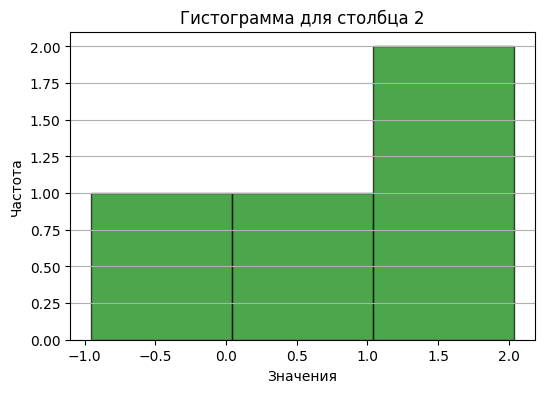

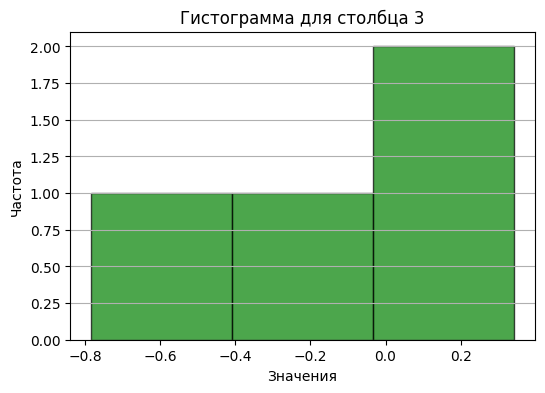

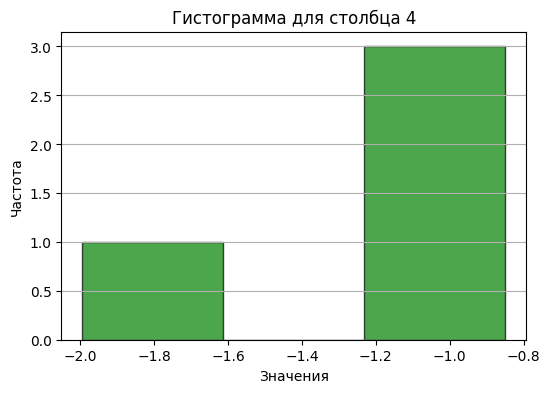

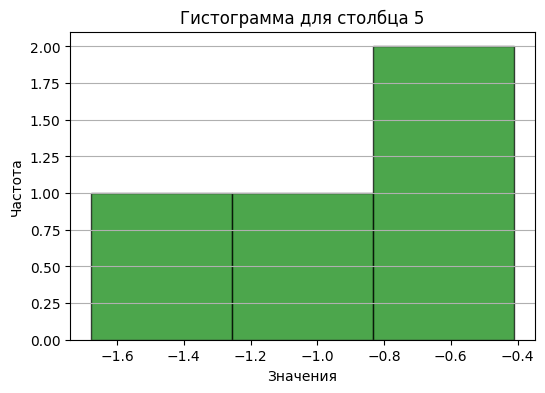

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_matrix_and_analyze(m, n, mean=0, std_dev=1):
    matrix = np.random.normal(loc=mean, scale=std_dev, size=(m, n))
    print(f"Сгенерированная матрица:\n{matrix}\n")

    row_means = matrix.mean(axis=1)  
    row_vars = matrix.var(axis=1)    

    col_means = matrix.mean(axis=0)
    col_vars = matrix.var(axis=0)  

    print(f"Средние значения по строкам: {row_means}")
    print(f"Дисперсии по строкам: {row_vars}\n")
    print(f"Средние значения по столбцам: {col_means}")
    print(f"Дисперсии по столбцам: {col_vars}\n")

    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[i], bins='auto', alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма для строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(axis='y')
        plt.show()

    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, j], bins='auto', alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма для столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(axis='y')
        plt.show()
generate_matrix_and_analyze(m=4, n=5)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = [[None] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix
assert chess(2, 2, 1, 0) == [
        [1, 0],
        [0, 1]
    ]

assert chess(3, 3, 'X', 'O') == [
        ['X', 'O', 'X'],
        ['O', 'X', 'O'],
        ['X', 'O', 'X']
    ]

assert chess(4, 5, 5, 10) == [
        [5, 10, 5, 10, 5],
        [10, 5, 10, 5, 10],
        [5, 10, 5, 10, 5],
        [10, 5, 10, 5, 10]
    ]

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [9]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)
    
    x0 = (m - a) // 2
    y0 = (n - b) // 2
    x1 = x0 + a
    y1 = y0 + b
    
    draw.rectangle([x0, y0, x1, y1], fill=rectangle_color)
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)
    
    x0 = (m - a) // 2
    y0 = (n - b) // 2
    x1 = x0 + a
    y1 = y0 + b
    
    draw.ellipse([x0, y0, x1, y1], fill=ellipse_color)
    
    return img
rectangle_img = draw_rectangle(200, 100, 400, 400, (255, 0, 0), (0, 255, 0))
rectangle_img.show() 

ellipse_img = draw_ellipse(200, 100, 400, 400, (0, 0, 255), (255, 255, 0))
ellipse_img.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
def compute_statistics(time_series):
    mean = np.mean(time_series) 
    variance = np.var(time_series) 
    std_dev = np.std(time_series)  
    
    return mean, variance, std_dev

def find_local_extrema(time_series):
    local_max = []  
    local_min = []  
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_max.append((i, time_series[i]))
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_min.append((i, time_series[i])) 
    
    return local_max, local_min

def moving_average(time_series, p):
    return np.convolve(time_series, np.ones(p) / p, mode='valid')
time_series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 4, 5, 7, 8, 3, 2])
    
mean, variance, std_dev = compute_statistics(time_series)
print(f"Математическое ожидание: {mean:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Среднеквадратическое отклонение: {std_dev:.2f}")
local_max, local_min = find_local_extrema(time_series)
print(f"Локальные максимумы: {local_max}")
print(f"Локальные минимумы: {local_min}")  
p = 3
smoothed_series = moving_average(time_series, p)
print(f"Скользящее среднее (размер окна {p}): {smoothed_series}")

Математическое ожидание: 3.57
Дисперсия: 6.39
Среднеквадратическое отклонение: 2.53
Локальные максимумы: [(2, 7), (5, 6), (11, 8)]
Локальные минимумы: [(3, 1), (6, 0)]
Скользящее среднее (размер окна 3): [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.66666667 3.33333333 5.33333333 6.66666667 6.         4.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
def one_hot_encoding(class_vector):
    num_classes = np.max(class_vector) + 1
    
    one_hot_matrix = np.zeros((len(class_vector), num_classes), dtype=int)
    
    one_hot_matrix[np.arange(len(class_vector)), class_vector] = 1
    
    return one_hot_matrix
class_vector = np.array([0, 2, 3, 0])
print(f"Входной вектор: {class_vector}")
encoded_matrix = one_hot_encoding(class_vector)
print(f"One-hot-encoding:\n{encoded_matrix}")

Входной вектор: [0 2 3 0]
One-hot-encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
